## Lab 4.2

### Activity 1


Name: `random-bytes`, `byte-per-character`

1. Write a Python code cell that creates 1000 random numbers (find the lecture notebook where we covered this by using the Bash commands `cd ~/phys248/Lectures` and `grep random *`) and write them into a file called `random.dat`. Write one random number in each line, but number them and write each line in the following format: 
```
__34_0.4504723
```
where `_` means a space. This can be done with a `for` loop using the `enumerate` function. 
2. Look into the `man` page of the `du` command and determine the command line option that will display the size of the file `random.dat` in bytes. Enter the number of bytes into the quiz question `random-bytes`.
3. Based on the content of the file and the file size in bytes, how many bytes are used to store each character? Enter this number into quiz question `byte-per-character`. Explain your reasoning in a Markdown cell.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['science', 'notebook'])

In [3]:
x = np.random.rand(1000)
f = open('random.dat', mode='w')
for i, xi in enumerate(x):
    f.write("{:4d} {:.7f}\n".format(i, xi))
f.close()

In [4]:
%%bash
du -b random.dat

15000	random.dat


In [5]:
%%bash
wc -m random.dat

15000 random.dat


Bytes/char = 1, so each char is stored in one byte. This is the case for all ascii files.

### Answer part 3:


### Activity 2


Name: `random_mod_y_mean`

1. Add the file `random.dat` to the `Labs` dir of your `phys248` repository, commit and push to remote.
2. Use the bash command `sed` and the output redirection `>` to create a file `random_mod.dat` which has the same content as `random.dat` except that all occurrence of `.9` are replaced with `.2` and all occurrences of `.8` change to `.1`. _Note:_ the dot `.` is a metacharacter and needs to be escaped with `\` (see lecture notebook 3.2) and for each replacement the old and new strings need to be in quotes. (Advanced topic: research the difference between single and double quotes). 
3. Read in the file `random_mod.dat` and save the columns into the float array variables `i` and `y`. Try to use the most compact way to do this, which should only take one line of code.
4. Make a histogram of both x and y. Make sure that both are easily visible!
5. Take the mean of `y` and enter it in the quiz question `random_mod_y_mean`

#### Commands for part 1 and 2
If you do these on the shell copy paste commands here:
```Shell
enter commands here ....
```

In [4]:
!pwd

/home/user/phys248/Labs


In [6]:
%%bash
#cd lab4.2
sed -e "s/\.9/\.2/g;s/\.8/\.1/g" random.dat > random_mod.dat

In [7]:
i, y = np.loadtxt('random_mod.dat', dtype=float, unpack=True)

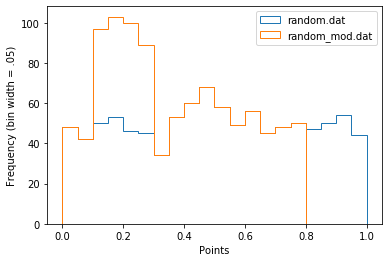

Mean of y =  0.36825581509999994


In [20]:
bins = np.linspace(0,1, 21) 
#use linspace to get 21 edges (including 0 and 1)
#also use linspace because it always has the same binwidth, 
# whereas 'bins=20' makes the binwidth depending on the range of values (so different for x and y)


plt.hist(x, bins=bins, histtype='step', label='random.dat')
plt.hist(y, bins=bins, histtype='step', label='random_mod.dat')
plt.xlabel("Points")
plt.ylabel("Frequency (bin width = .05)")
plt.legend()
plt.show()

print("Mean of y = ", np.mean(y))
